In [1]:
# Importação de bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.proportion import proportions_ztest

In [11]:
# Carregando o dataset

file_path = r'C:\Users\user\Documents\ab-testing-landing-page\data\ab_data.csv'
df = pd.read_csv(file_path)

In [12]:
# Exibindo as primeiras linhas para conferência
print('Dataset preview:')
display(df.head())

Dataset preview:


,user_id,timestamp,group,landing_page,converted
0,851104,11:48.6,control,old_page,0
1,804228,01:45.2,control,old_page,0
2,661590,55:06.2,treatment,new_page,0
3,853541,28:03.1,treatment,new_page,0
4,864975,52:26.2,control,old_page,1


In [13]:
# Conferir nomes das primeiras colunas
print('Columms', df.columns.to_list())

Columms ['user_id', 'timestamp', 'group', 'landing_page', 'converted']


In [29]:
# Verificação de valores ausentes
print("Valores ausentes por coluna:")
print(df.isnull().sum())

Valores ausentes por coluna:
user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64


In [15]:
# Calculo de taxas de conversão por grupo
conversion_rates = df.groupby('group')['converted'].mean()
print('Conversion rates by group:')
print('conversion_rates')

Conversion rates by group:
conversion_rates


In [23]:
# Verificando taxas de conversão
df.groupby('group')['converted'].mean()

group
control      0.120399
treatment    0.118918
Name: converted, dtype: float64

In [26]:
# Teste estatístico: Z-test para proporções
successes = df.groupby('group')['converted'].sum().values
n_obs = df.groupby('group')['converted'].count().values

z_stat, p_value = proportions_ztest(successes, n_obs)
print(f"\nZ-statistic: {z_stat:.4f}")
print(f"P-value: {p_value:.6f}")


Z-statistic: 1.2383
P-value: 0.215612


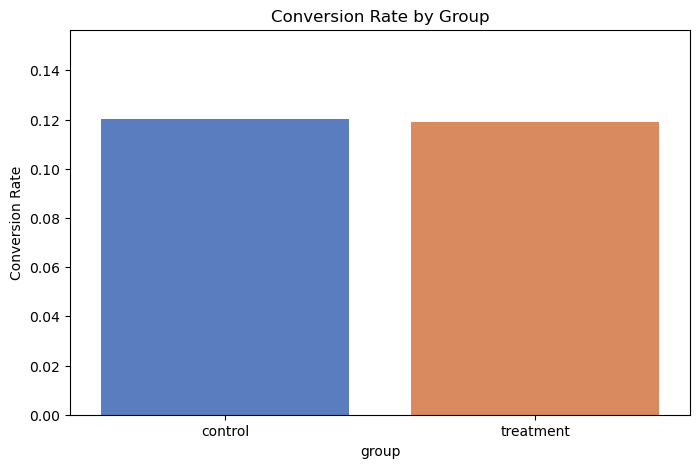

In [28]:
# Visualização das taxas de conversão
plt.figure(figsize=(8,5))
sns.barplot(x=conversion_rates.index, y=conversion_rates.values, hue=conversion_rates.index, palette='muted', legend=False)
plt.title("Conversion Rate by Group")
plt.ylabel("Conversion Rate")
plt.ylim(0, max(conversion_rates.values)*1.3)
plt.show()